<img src="./caps/utn.jpg" align="right" width="150" /> 
#### Teoría de los Circuitos II - 2021

## Corrección y simulaciones de tarea semanal.

#### Lauría Juan


<div class="alert alert-block alert-info">
<b>1)</b> Cálculo de parámetros.
</div></div>

In [10]:
## Cálculo de n para omega_s1
import numpy as npy
import math as m

alfa_max = 0.5 # dB
alfa_min = 16 # dB
omega_p = 1 # norm omega
omega_s = 2.64 # norm omega

eps = npy.sqrt(10**(alfa_max/10)-1)

print( 'eps = {:3.3f}  -  eps**2 = {:3.3f}'.format(eps, eps**2) )

for ii in range(1,7):
    
    a = ii * (m.acosh(omega_s))
    b = (npy.cosh(a))**2
    att = 10 * npy.log10(eps**2 * b)
    
    print('alpha_{:d} = {:3.3f} dB'.format(ii,att)) 

eps = 0.349  -  eps**2 = 0.122
alpha_1 = -0.704 dB
alpha_2 = 13.102 dB
alpha_3 = 27.213 dB
alpha_4 = 41.335 dB
alpha_5 = 55.458 dB
alpha_6 = 69.581 dB


In [11]:
## Cálculo de n para omega_s2
import numpy as npy
import math as m

alfa_max = 0.5 # dB
alfa_min = 24 # dB
omega_p = 1 # norm omega
omega_s = 5.15 # norm omega

eps = npy.sqrt(10**(alfa_max/10)-1)

print( 'eps = {:3.3f}  -  eps**2 = {:3.3f}'.format(eps, eps**2) )

for ii in range(1,7):
    
    a = ii * (m.acosh(omega_s))
    b = (npy.cosh(a))**2
    att = 10 * npy.log10(eps**2 * b)
    
    print('alpha_{:d} = {:3.3f} dB'.format(ii,att)) 

eps = 0.349  -  eps**2 = 0.122
alpha_1 = 5.100 dB
alpha_2 = 25.192 dB
alpha_3 = 45.365 dB
alpha_4 = 65.538 dB
alpha_5 = 85.712 dB
alpha_6 = 105.886 dB


In [12]:
import numpy as npy

ee_2 = eps**2
den = [-16*ee_2,0,-24*ee_2,0,-9*ee_2,0,1]

print(npy.roots(den))

[-0.31322824+1.02192749j -0.31322824-1.02192749j  0.31322824+1.02192749j
  0.31322824-1.02192749j -0.62645649+0.j          0.62645649+0.j        ]


<div class="alert alert-block alert-warning">
<b>Comentario:</b> Se toman N = 3 y los polos del lado izquierdo del Plano Z.</div>

<div class="alert alert-block alert-info">
<b>2)</b> Simulación matemática.
</div></div>

<div><center>La cascada de SOS obtenida fue:</center></div>

<div><center>$\Large T_{BP}(\$) = \frac{$ \cdot 0,1253}{$^2 + 0,1253 + 1} \cdot \frac{$ \cdot 0,067 \cdot 3,5}{$^2 + 0,067 + 1,23} \cdot \frac{$ \cdot 0,056 \cdot 3,5}{$^2 + 0,056 + 0,81} $</center></div>

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

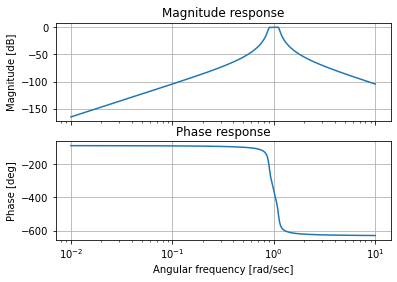

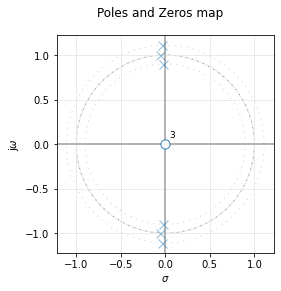

In [1]:
from scipy import signal
from splane import pzmap, grpDelay, bodePlot
from scipy.signal import TransferFunction,bode
import matplotlib.pyplot as plt
import numpy as npy


k1 = 0.1253
k2 = 0.067*3.5
k3 = 0.056*3.5

transferencia = npy.array([[1,0.1253,1,1*k1,0],[1,0.067,1.23,1*k2,0],
                           [1,0.056,0.81,1*k3,0]])

b,a = signal.sos2tf(transferencia)

my_tf = TransferFunction(a,b)

## Ploteo.
bodePlot(my_tf)
pzmap(my_tf)

<img src="./caps/zoom-mat.jpg" align="center" width="800" /> 

<div class="alert alert-block alert-info">
<b>3)</b> Estructuras pasivas buffereadas.
</div></div>

<img src="./caps/pas.jpg" align="center" width="500" /> 

<div><center>$\Large \frac{Vo}{Vi} = \frac{\frac{S}{RC}}{S^2+S\frac{1}{RC}+\frac{1}{LC}} $</center></div>

<div class="alert alert-block alert-warning">
<b>Comentario:</b> Realicé una modificación a los valores calculados en papel ya que en la simulación no obtenía el riple característico de una aproximación de Chebyshev. Por lo tanto, en base a la estructura pasiva, fijé los valores de todos los capacitores en $C = 1$ y en base a las transferencias planteadas volví a recalcular las R y L de cada etapa.</div>

<div class="alert alert-block alert-info">
<b>4)</b> Circuito planteado sin ganancia.
</div></div>

<img src="./caps/circmal.jpg" align="center" width="800" /> 

<img src="./caps/tranmal.jpg" align="center" width="800" /> 

<div class="alert alert-block alert-warning">
<b>Comentario:</b> Como se observa en la imagen estoy aproximadamente 21dB abajo por lo cual implementaré circuitos no inversores que ganen 12 veces entre los 3 y así obtener 0dB en la banda de paso.
</div>

<div class="alert alert-block alert-info">
<b>5)</b> Circuito con ganancia.
</div></div>

<img src="./caps/circ1.jpg" align="center" width="800" /> 

<img src="./caps/tran1.jpg" align="center" width="800" /> 

<div class="alert alert-block alert-info">
<b>6)</b> Revisión y pequeña correción.
</div></div>

<div class="alert alert-block alert-warning">
<b>Comentario:</b> Se revisó la transferencia calculada en papel y se encontró un pequeño error en una de las ganancias. Sin embargo, no hubo variación en los denominadores de 2do orden, sino en la ganancia de 2 de ellos. Los valores de los componentes prácticamente no tuvieron modificación alguna excepto en sus decimales.
</div>

<img src="./caps/corrección-2.jpg" align="center" width="800" /> 

<img src="./caps/corrección-22.jpg" align="center" width="800" /> 

<div class="alert alert-block alert-info">
<b>7)</b> Reemplazando con estrutura GIC las bobinas.
</div></div>

<div class="alert alert-block alert-warning">
<b>Comentario:</b> Para este caso, se volvieron a calcular los valores de los componentes del GIC. Se fijaron los valores de los capacitores en 1 al igual que los valores de la resistencia central y la que está a masa. Luego, en base a la expresión de su ganancia y del calculo de la impedancia que refleja se hallaron los valores.
</div>

<img src="./caps/gic3.jpg" align="center" width="500"/> 

<div><center>$\Large H = 1 + \frac{R4}{R5} = 1 + \frac{1.28}{1}$</center></div>

<div><center>Como se vió en la estructura anterior, se fijara una ganancia en cada etapa de 2.28 para compensar los -21dB. Así se fijarán R4 y R5.</center></div>
    


<div><center>Luego se fijarán los valores C = 1 y R3 = 1. Así, sólo bastará calcular el valor de R1 de la siguiente manera.</center></div>
    


<div><center>$\Large L = \frac{R4}{R5 * R3 * R1 * C}$</center></div>

<div><center>$\Large R1 = \frac{1.28}{1 * 1 * L * 1}$</center></div>

<div><center>Donde el valor de L será el valor de las bobinas propuestas en la estructura anterior.</center></div>

<img src="./caps/gics1.jpg" align="center" width="800" /> 

<img src="./caps/gics2.jpg" align="center" width="800" /> 